In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
sc.set_figure_params(dpi=200)

In [ ]:
import pcreode
import igraph
igraph.__version__ #Last I tried, this worked with ver 0.7.1

In [ ]:
scenic = sc.read_h5ad("../Epi_SCENIC_V11.h5ad") #contains pre-run PCA and UMAP .obsm values.

/home/bob/anaconda3/envs/pcreode/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'Kmeans' as categorical


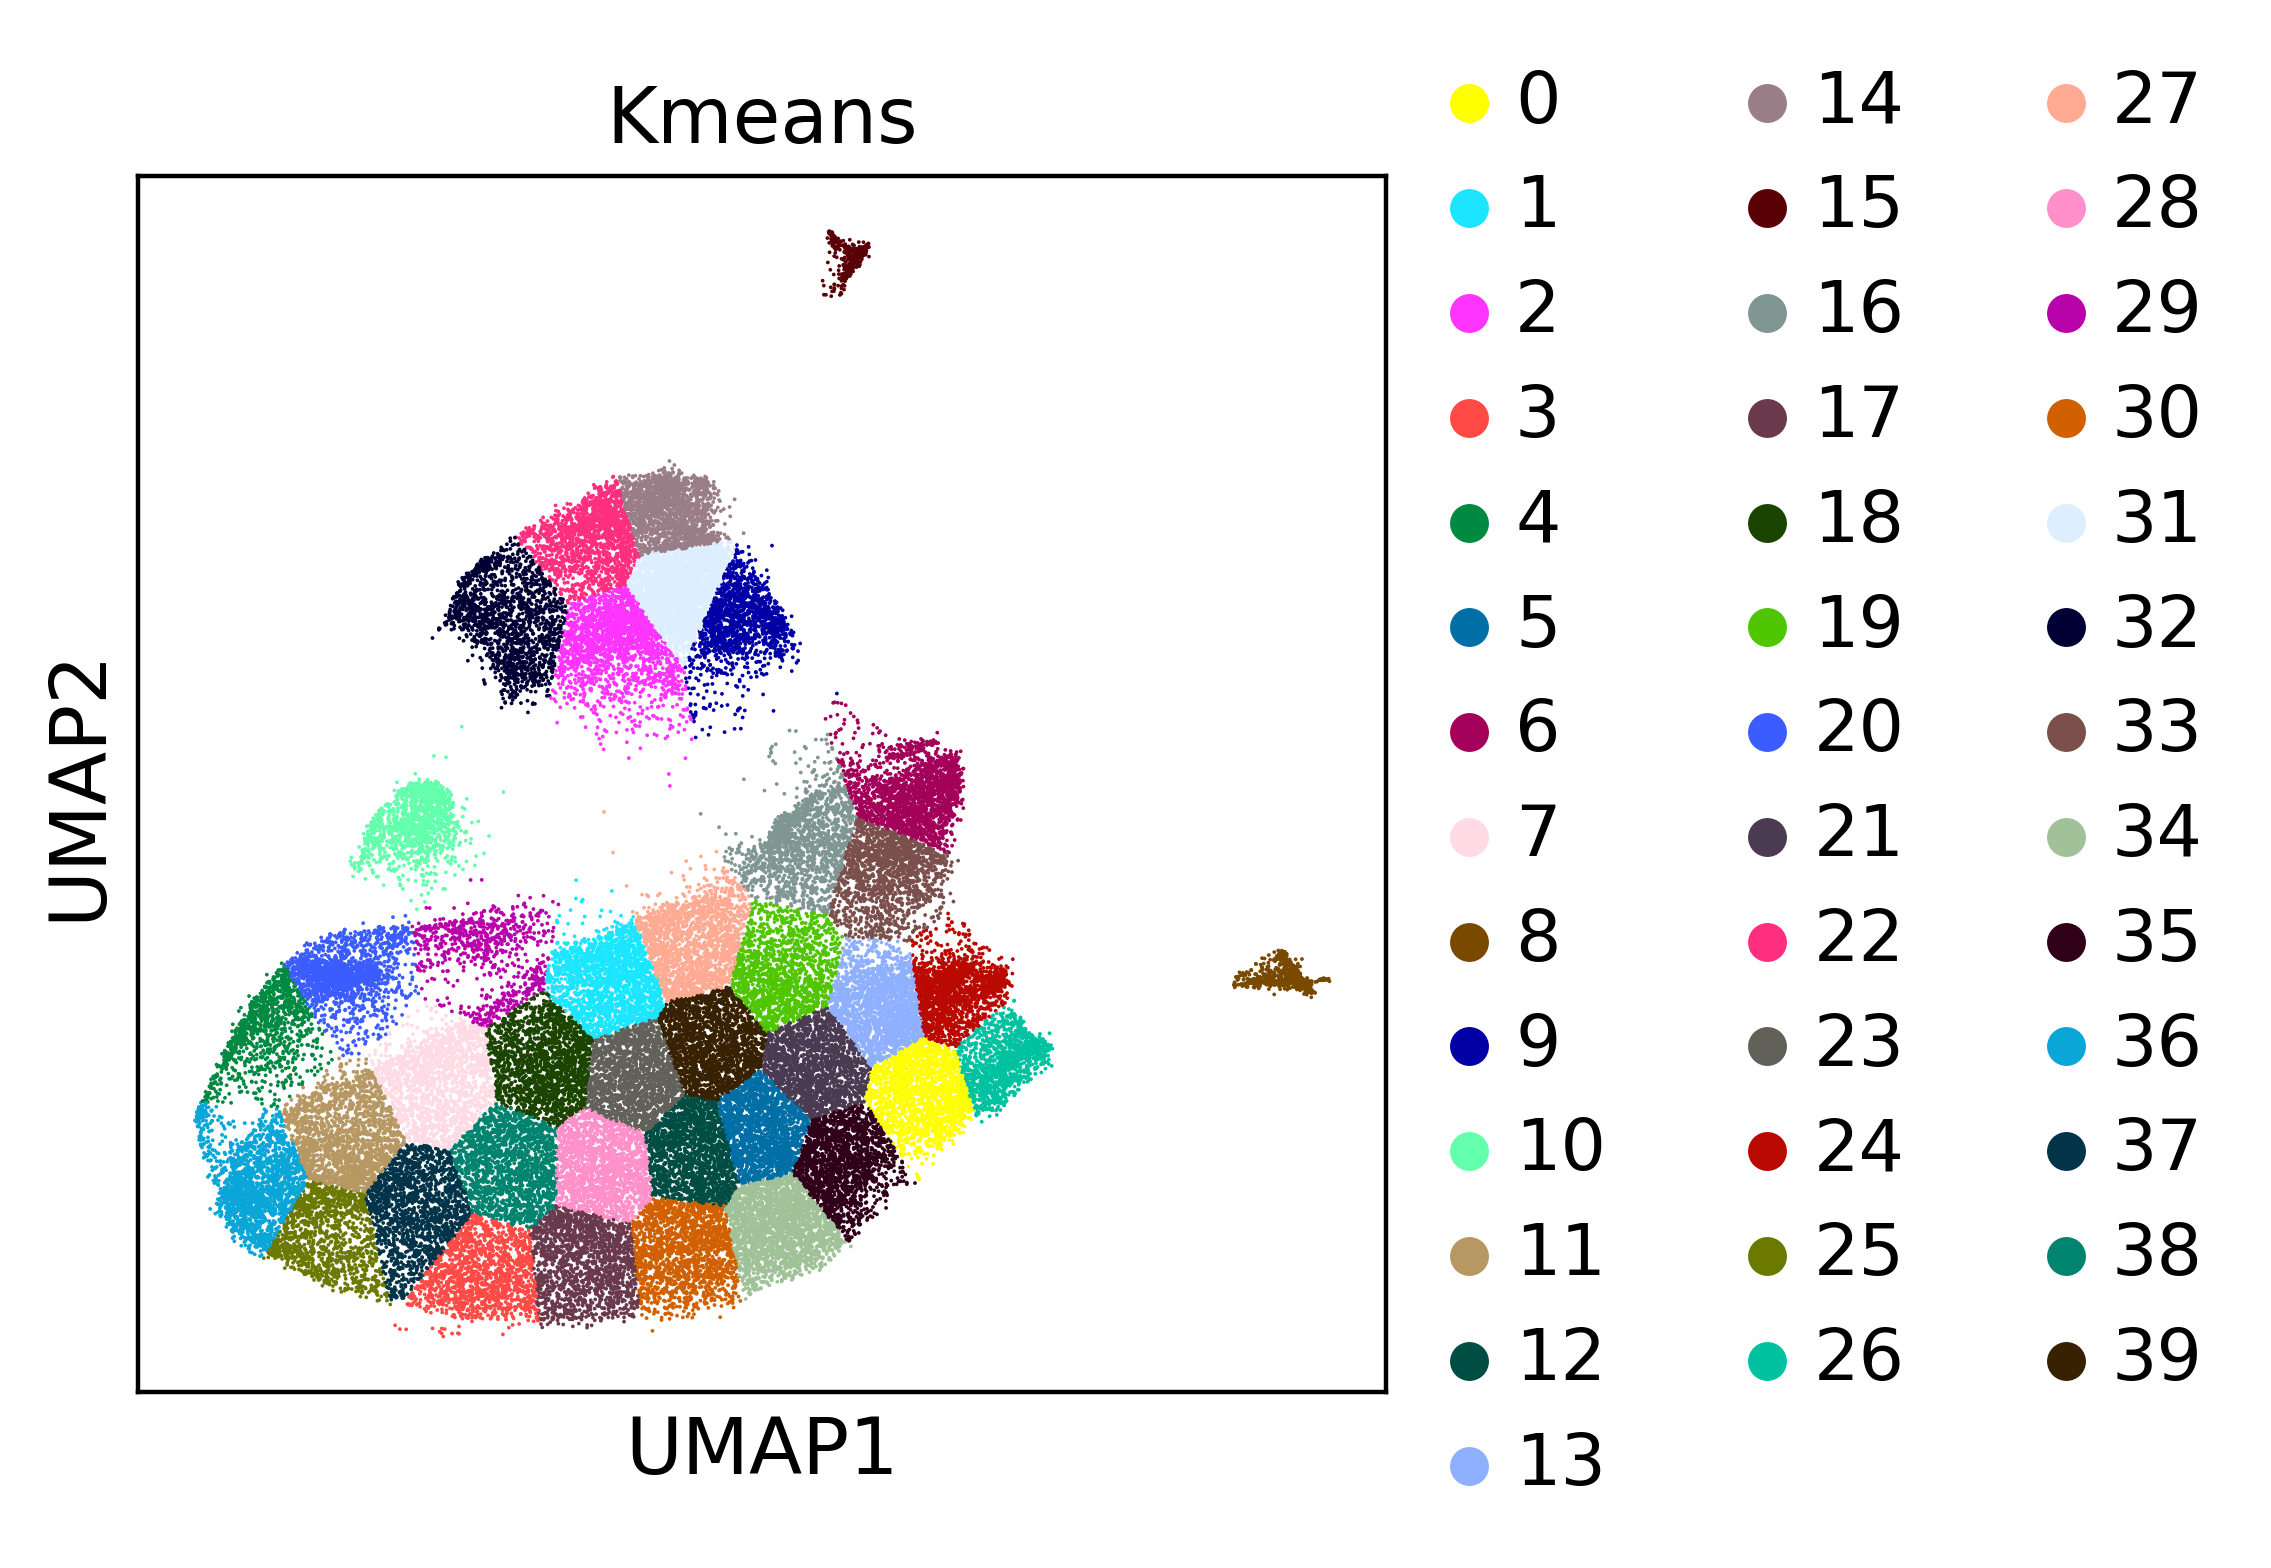

In [19]:
sc.pl.umap(scenic,color=['Kmeans']) #just did a simple Kmeans on the UMAP

In [19]:
#kind of clunky, but the supervised version of pcreode takes in a list of lists, so this is sort of just hacked together to produce that from some .obs label, Kmeans in this case, but could do leiden.

endstates = [list(np.where(np.isin(scenic.obs['Kmeans'],['10']))[0]),
list(np.where(np.isin(scenic.obs['Kmeans'],['20']))[0]),
list(np.where(np.isin(scenic.obs['Kmeans'],['32']))[0]),
list(np.where(np.isin(scenic.obs['Kmeans'],['15']))[0]),
list(np.where(np.isin(scenic.obs['Kmeans'],['8']))[0]),
list(np.where(np.isin(scenic.obs['Kmeans'],['6']))[0]), 
list(np.where(np.isin(scenic.obs['Kmeans'],['24']))[0]), 
list(np.where(np.isin(scenic.obs['Kmeans'],['36']))[0]), 
list(np.where(np.isin(scenic.obs['Kmeans'],['21']))[0])]

In [ ]:
#you'll need to figure out the density vector, noise, and target values as normal so i dont have that included here

In [ ]:
#input is just the pca, man_clust parameter set to the endstates defined through Kmeans
#note that this can take a ton of RAM, every single cell in the endstates list is used and is NOT subject to downsampling, thus increasing the floor memory usage. All other cells are downsampled though and behave as normal.

In [21]:
out_graph, out_ids = pcreode.pCreode_supervised( data=scenic.obsm['X_pca'], density=np.array(scenic.obs['Density']), noise=noise, 
                                      target=target, file_path=file_path, num_runs=50,man_clust=endstates,start_id=0)

Performing 50 independent runs, may take some time
Number of data points in downsample = 6430
Constructing density kNN
Finished 1.1 - 
Finished symmetric
Finished multiply
Finished d_knn
Manual cluster adding
Manual cluster adding
Fix endstate index
remake d_knn
Connecting closest endpoint neighbors
hierarchical placing
consensus aligning
saving files for run_num 1
Number of data points in downsample = 6386
Constructing density kNN
Finished 1.1 - 
Finished symmetric
Finished multiply
Finished d_knn
Manual cluster adding
Manual cluster adding
Fix endstate index
remake d_knn
Connecting closest endpoint neighbors
hierarchical placing
consensus aligning
saving files for run_num 2
Number of data points in downsample = 6528
Constructing density kNN
Finished 1.1 - 
Finished symmetric
Finished multiply
Finished d_knn
Manual cluster adding
Manual cluster adding
Fix endstate index
remake d_knn
Connecting closest endpoint neighbors
hierarchical placing
consensus aligning
saving files for run_num 

In [22]:
graph_ranks = pcreode.pCreode_Scoring( data=scenic.obsm['X_pca'], file_path=file_path, num_graphs=50)

scoring graph 1
scoring graph 2
scoring graph 3
scoring graph 4
scoring graph 5
scoring graph 6
scoring graph 7
scoring graph 8
scoring graph 9
scoring graph 10
scoring graph 11
scoring graph 12
scoring graph 13
scoring graph 14
scoring graph 15
scoring graph 16
scoring graph 17
scoring graph 18
scoring graph 19
scoring graph 20
scoring graph 21
scoring graph 22
scoring graph 23
scoring graph 24
scoring graph 25
scoring graph 26
scoring graph 27
scoring graph 28
scoring graph 29
scoring graph 30
scoring graph 31
scoring graph 32
scoring graph 33
scoring graph 34
scoring graph 35
scoring graph 36
scoring graph 37
scoring graph 38
scoring graph 39
scoring graph 40
scoring graph 41
scoring graph 42
scoring graph 43
scoring graph 44
scoring graph 45
scoring graph 46
scoring graph 47
scoring graph 48
scoring graph 49
Most representative graph IDs from first to worst [17 28 45  4 21 40 38 25  3 26 31 12 46 47 43 30 18 42 29 16 10 49 35 48
  1 36  9 20 33 41 37 13 15  0 34 24 14 23  8 22 19 2